In [168]:
import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

In [169]:
def spectral_plot(df, figure_title, save_title=None):
    
    colnms = df.columns[2:]
    
    # creating a list of lists containing the reflectance of every band in each df row.
    spectral_lib = []
    for n, i in enumerate(df.iterrows()):
        plotngdata = [df[c].iloc[n] for c in colnms]
        spectral_lib.append(plotngdata)
    
    plt.rcParams['figure.figsize'] = [12, 6] 
    

    fig = plt.figure()
    fig.show()
    ax1 = fig.add_subplot(111)
      
    ax1.set_xlabel('Wavelenght (nm)')
    ax1.set_ylabel('Reflectance (%)')
    ax1.set_title(figure_title, y=1, fontsize=16)

    for n, spec_curve in enumerate(spectral_lib):
        ax1.plot(colnms, spec_curve, alpha=0.4, c='k')
    
    plt.show()

#### Read the XLS sheets

In [170]:
# Path to your XLS files
path = 'D:/A1_JM/aulas_unb_jm/trabalho_disciplina'

lu = pd.read_excel(os.path.join(path,'radiometria_notas.xls'),sheet_name='Lu')
ld = pd.read_excel(os.path.join(path,'radiometria_notas.xls'),sheet_name='Ld')
ed = pd.read_excel(os.path.join(path,'radiometria_notas.xls'),sheet_name='Ed')
# Quick check for size compatibility
print(len(lu),len(ld),len(ed))

267 267 267


#### Remove out-of-bound radiance measurements

In [171]:
students = ['A1','A2','A3','A4','A5','A6']

In [172]:
ed = ed[ed['CLS'].isin(students)]
x_ed = ed.iloc[:, :ed.columns.get_loc(951.78610574208)+1]

ld = ld[ld['CLS'].isin(students)]
x_ld = ld.iloc[:, :ld.columns.get_loc(951.78610574208)+1]

lu = lu[lu['CLS'].isin(students)]
x_lu = lu.iloc[:, :lu.columns.get_loc(951.78610574208)+1]

print(len(x_lu),len(x_ld),len(x_ed))

254 254 254


#### Plot Ed, Lu and Ld measurements by student

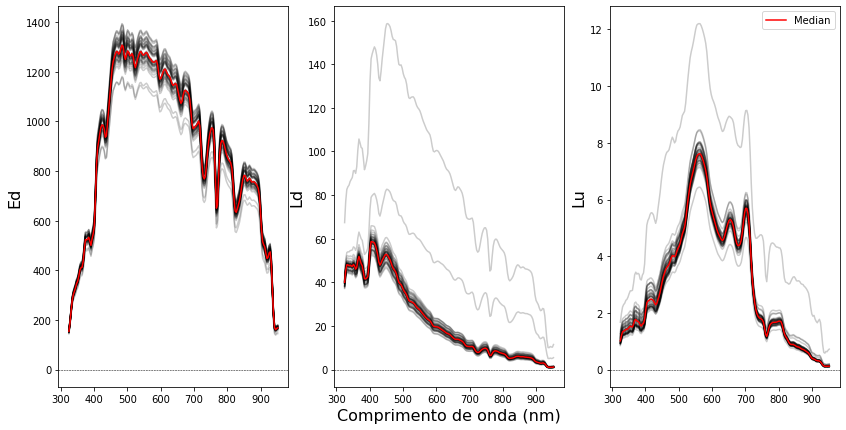

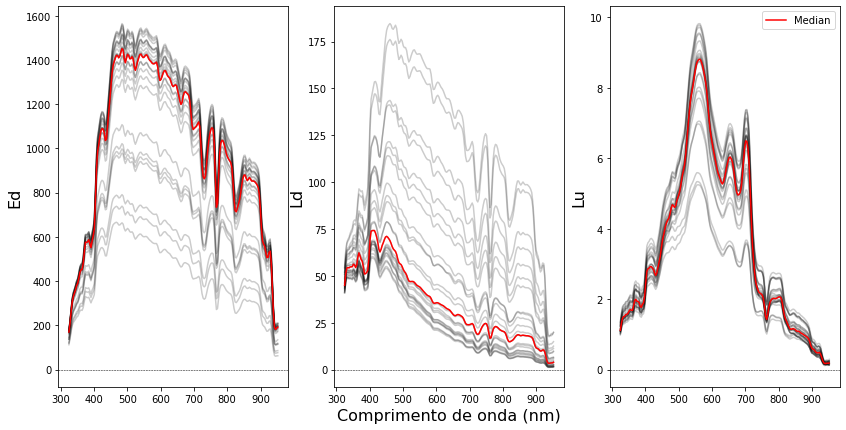

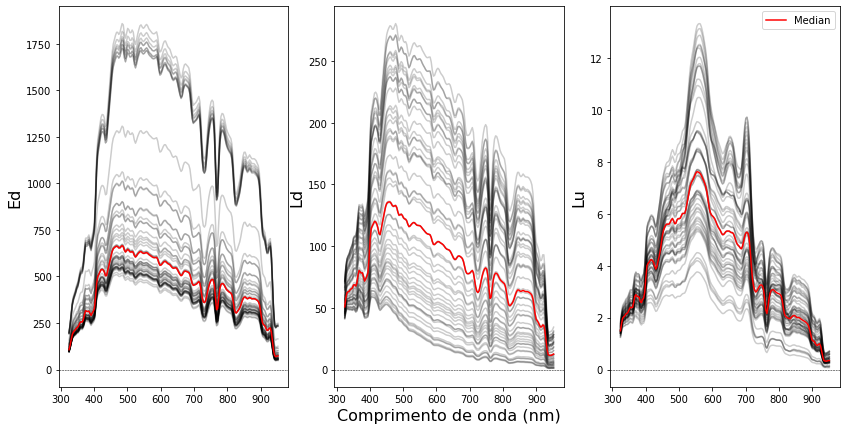

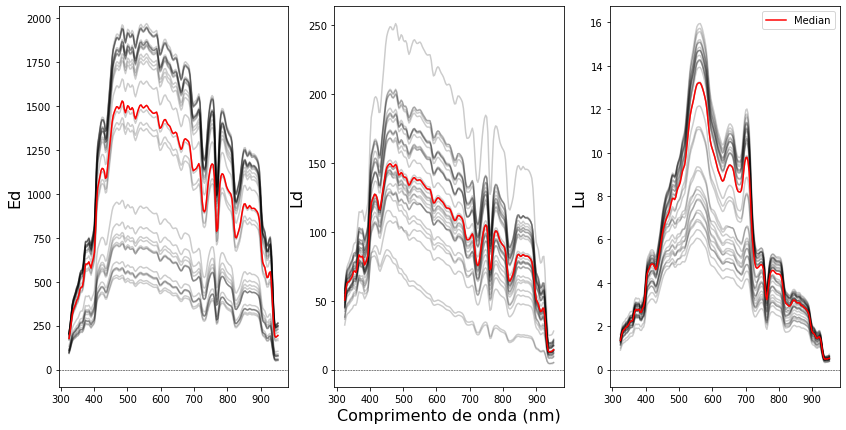

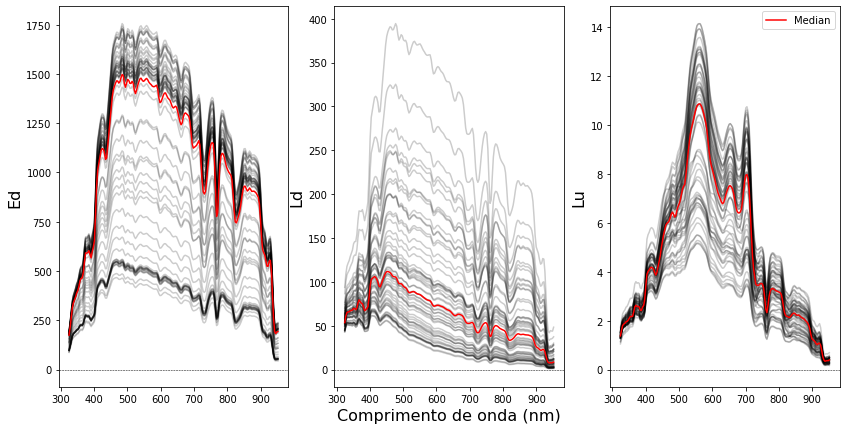

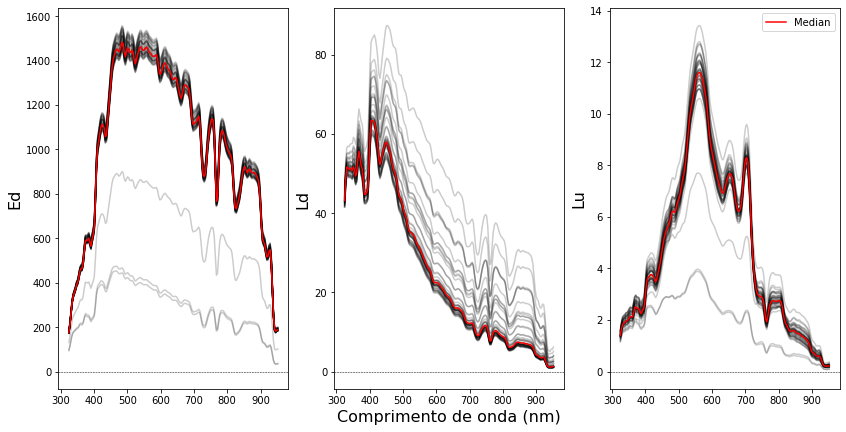

In [173]:
for n, st in enumerate(students):
    
    # Copy rad data for each student
    st_ed = x_ed[x_ed['CLS'] == st]
    st_ld = x_ld[x_ld['CLS'] == st]
    st_lu = x_lu[x_lu['CLS'] == st]
    
    # Drop "CLS" and "Hora" columns
    st_ed = st_ed.iloc[:, 2:].copy()
    st_ld = st_ld.iloc[:, 2:].copy()
    st_lu = st_lu.iloc[:, 2:].copy()
    
    # PLOT
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    
    #fig.suptitle(f'{st} radiometry for Ed, Ld and Lu')
    
    df = st_ed
    
    ax1.set_ylabel('Ed', fontsize=16)
    ax1.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
    # Iterate over rows for plotting
    for index, row in df.iterrows():
        ax1.plot(df.columns, row, c='k', alpha=0.2)
    ax1.plot(df.median(),c='r',label='Median')
    
    df = st_ld
    ax2.set_xlabel('Comprimento de onda (nm)', fontsize=16)
    ax2.set_ylabel('Ld', fontsize=16)
    ax2.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
    # Iterate over rows for plotting
    for index, row in df.iterrows():
        ax2.plot(df.columns, row, c='k', alpha=0.2)
    ax2.plot(df.median(),c='r',label='Median')
    
    df = st_lu
    
    ax3.set_ylabel('Lu', fontsize=16)
    ax3.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
    # Iterate over rows for plotting
    for index, row in df.iterrows():
        ax3.plot(df.columns, row, c='k', alpha=0.2)
    ax3.plot(df.median(),c='r',label='Median')
    ax3.legend()
    plt.savefig(savepathname/(st+'_Ed_Ld_Lu'), bbox_inches='tight')
    # plt.show()

#### Get the Reflectance (rho = 0.028)

In [174]:
# Remove STR columns to enable math operations between the DFs 
x_ed = x_ed.iloc[:, 2:].copy()
x_ld = x_ld.iloc[:, 2:].copy()
x_lu = x_lu.iloc[:, 2:].copy()

In [175]:
def calc_reflectance(ed, lu, ld, rho=0.028):
    r_rs = (lu - rho * ld) / ed
    return r_rs

In [176]:
x_rrs = calc_reflectance(ed=x_ed, lu=x_lu, ld=x_ld)

In [177]:
# Re-insert CLS column in the first df column
idx = 0
str_col = ed['CLS']
x_rrs.insert(loc=idx, column='CLS', value=str_col)

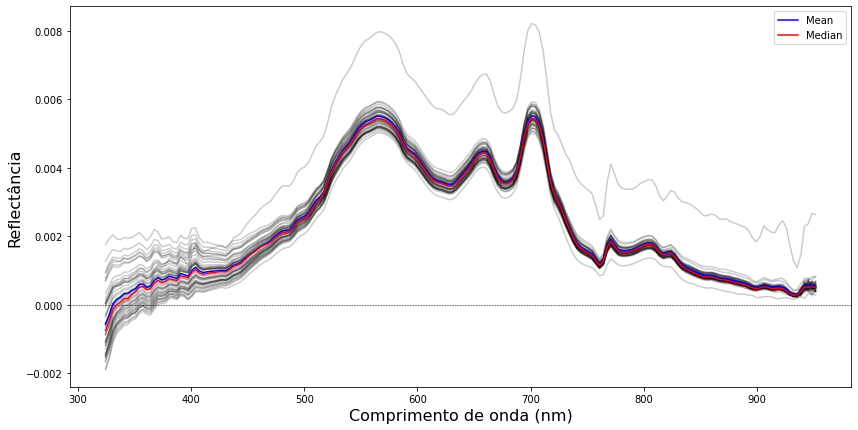

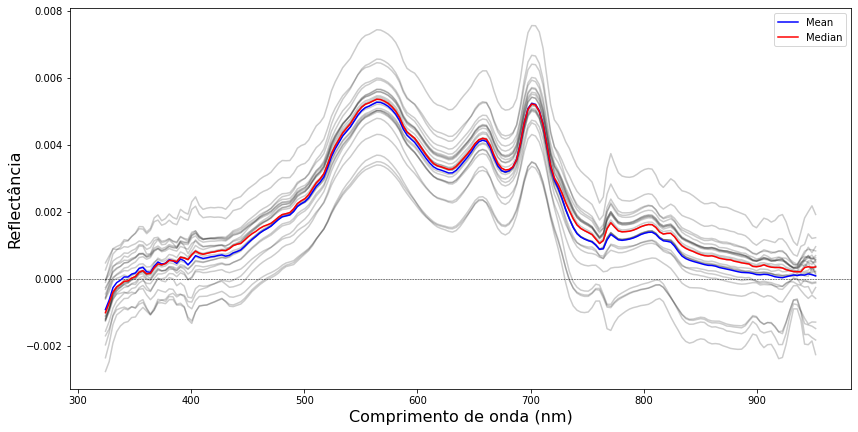

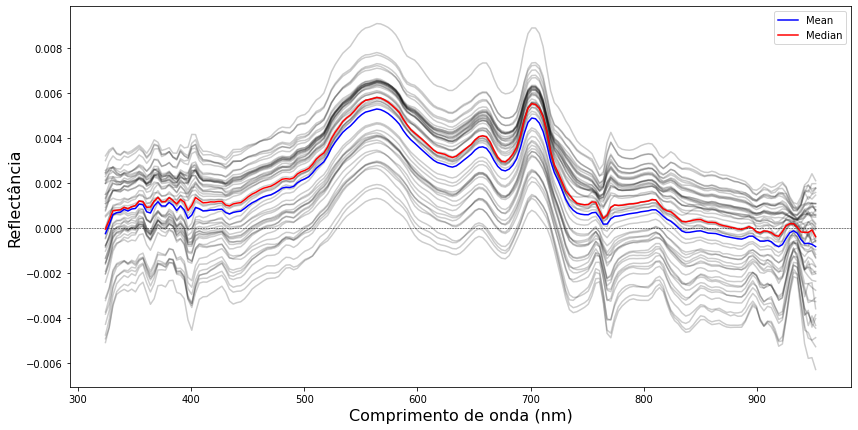

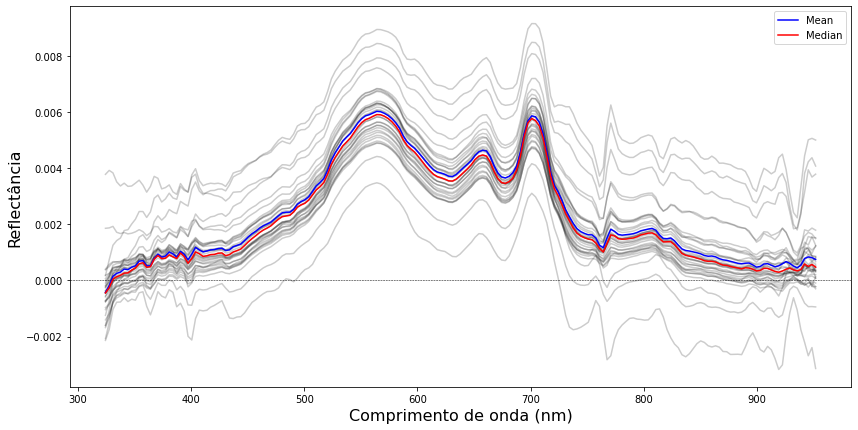

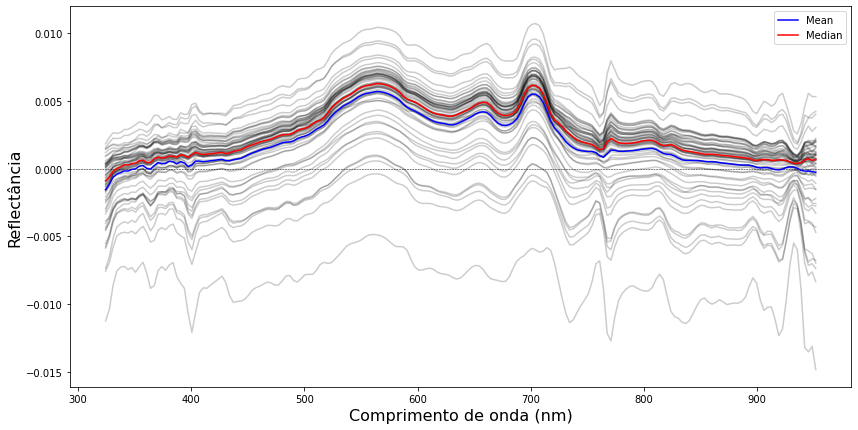

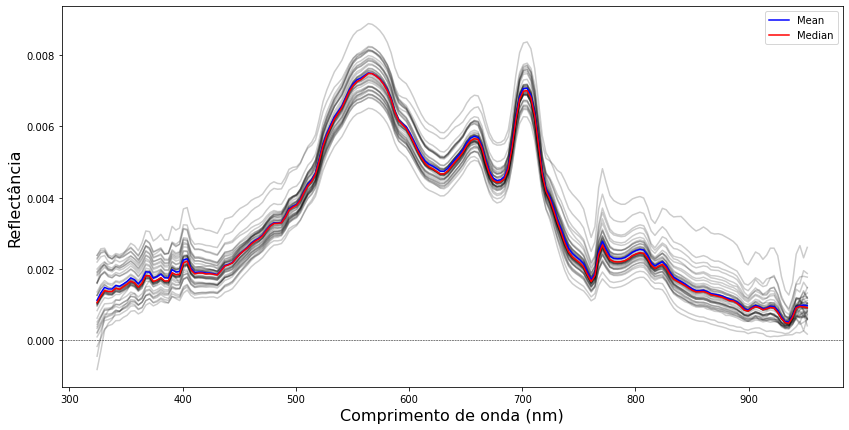

In [231]:
savepathname = Path(r'D:/A1_JM/aulas_unb_jm/trabalho_disciplina/pictures/')

plt.rcParams["figure.figsize"] = [14.0, 7.0]

rrs_dict = {}
rrs_med_dict = {}
for n, st in enumerate(students):
    st_rrs = x_rrs[x_rrs['CLS'] == st]
    rrs_dict[st] = st_rrs
    # PLOT
    #plt.title(f'Rrs {st}')
    plt.xlabel('Comprimento de onda (nm)', fontsize=16)
    plt.ylabel('Reflectância', fontsize=16)
    plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
    # Iterate over rows for plotting
    for index, row in st_rrs[x_ed.columns].iterrows():
        plt.plot(x_ed.columns, row, c='k', alpha=0.2)
    plt.plot(rrs_dict[st].mean(),c='b',label='Mean')
    plt.plot(rrs_dict[st].median(),c='r',label='Median')
    plt.legend()
    plt.savefig(savepathname/('Rrs_'+st), bbox_inches='tight')
    plt.show()

In [179]:
# Create a dataframe from a list of medians of each student
rrs_med_dict = pd.DataFrame([rrs_dict[st].median() for st in students])

# Add the student CLS in the first column of the DF
rrs_med_dict.insert(loc=0, column='CLS', value=students)

In [180]:
# This will return the name of the column (wavelenght) where the maximum value occurs for each row (student)
for index, row in rrs_med_dict.iloc[:,1:].iterrows():
    print(row.idxmax())
    
# find_nearest(rrs_med_dict.columns[1:],564)
# rrs_med_dict.iloc[:,72]

700.99818624
564.10640459217
564.10640459217
564.10640459217
564.10640459217
564.10640459217


In [182]:
row.iloc[72] == row.loc[564.10640459217]

True

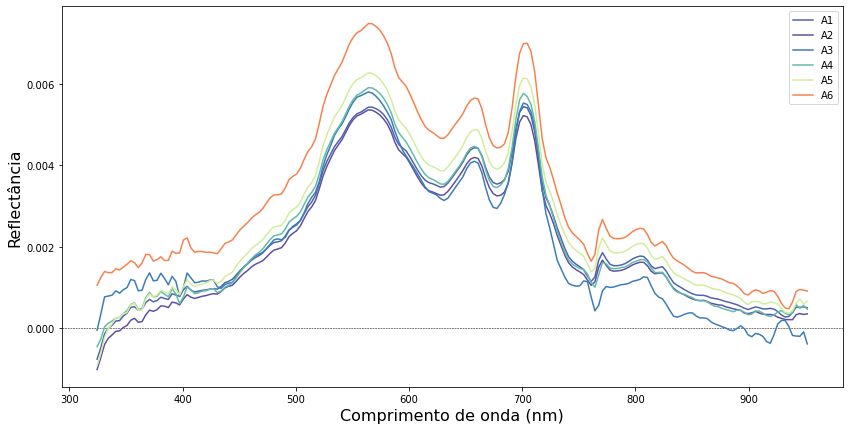

In [183]:
import matplotlib
import matplotlib.cm as cm

savepathname = Path(r'D:/A1_JM/aulas_unb_jm/trabalho_disciplina/pictures/')

# creating custom color scale based on wavelenght 564nm or 700nm (peak reflectances on the chart)
lst = rrs_med_dict.loc[:,564.10640459217]
minima = rrs_med_dict.loc[:,564.10640459217].min()
maxima = rrs_med_dict.loc[:,564.10640459217].max()

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Spectral_r)
# Fore more colormaps, look at:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.rcParams["figure.figsize"] = [14.0, 7.0]

#plt.title(f'Median Rrs by individual student.')
plt.xlabel('Comprimento de onda (nm)', fontsize=16)
plt.ylabel('Reflectância', fontsize=16)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')

for idx, row in rrs_med_dict.iterrows():
    # cmap564 = mapper.to_rgba(row.loc[564.10640459217])
    cmap564 = mapper.to_rgba(row.loc[700.99818624])
    plt.plot(row.index[1:], row.values[1:], c=cmap564, label=row['CLS'])

plt.legend()
plt.savefig(savepathname/'a1to6_medRrs', bbox_inches='tight')
plt.show()

#### Inversion models

In [35]:
# Gitelson 2008
def chla_gitelson(rs665, rs715, rs750):
    # RED, RED_EDGE_1, RED_EDGE_2
    chl = 23.1 + 117.4*(1/rs665 - 1/rs715) * rs750
    chl = np.where(chl < 0, np.nan, chl)
    return chl

# Nechad 2010
def nechad(rs700):
    # water leaving reflectance = np.pi * Rrs
    # Lu / Ed
    ssd = ((445.11 * (np.pi * rs700)) / (1 - ((np.pi * rs700) / 0.1864))) + 1.13
    return ssd

# Castillo 2008
def castillo(rs510,rs670):
    # http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1061.814&rep=rep1&type=pdf
    # On the use of ocean color remote sensing to measure the transport of dissolved organic carbon by the Mississippi River Plume
    cdom412 = -0.9 * (rs510/rs670) + 2.34
    return cdom412

In [23]:
# small trick to find the closest column to the correct one 
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [24]:
wavelenght = 670
st_rrs.columns[find_nearest(st_rrs.columns[1:], wavelenght)+1]

670.99062858993

In [25]:
# Calculate and populate the dictionaries for each student and each inversion model

gitelson_dict = {}
nechad_dict = {}
castillo_dict = {}

for n, st in enumerate(students):
    st_rrs = x_rrs[x_rrs['CLS'] == st]
    rrs_dict[st] = st_rrs
    
    gitelson_dict[st] = chla_gitelson(rs665=st_rrs[664.31762639187],
                                      rs715=st_rrs[714.32214953472],
                                      rs750=st_rrs[750.91390703625])
    
    nechad_dict[st] = nechad(rs700=st_rrs[700.99818624])
    
    castillo_dict[st] = castillo(rs510=st_rrs[510.64941535041],
                                 rs670=st_rrs[670.99062858993])

In [230]:
for st in students:

    df_hora = ed[ed['CLS']==st]
    df = pd.DataFrame(list(zip(df_hora['Hora'].dt.strftime('%H:%M:%S'),gitelson_dict[st], nechad_dict[st], castillo_dict[st])),columns=['Hora','Clorofila','Sed.Susp.','CDOM'])
    print(st, df, '\n')
    print(st, df.mean(), '\n')
    print(st, df.median(), '\n')

A1         Hora  Clorofila  Sed.Susp.      CDOM
0   09:53:54  23.049954   3.724717  1.652751
1   09:54:03  22.404240   3.492263  1.614974
2   09:54:13  22.374120   3.692214  1.590145
3   09:54:24  22.299072   3.618166  1.623039
4   09:54:34  21.817534   3.628154  1.552389
5   09:54:43  21.956212   3.612797  1.571792
6   09:54:54  22.247050   3.546645  1.624775
7   09:55:04  22.517558   3.709361  1.624252
8   09:55:13  22.276258   3.793352  1.615037
9   09:55:23  22.467755   3.687637  1.596450
10  09:55:34  22.591527   3.827163  1.584478
11  09:55:44  22.775671   3.795671  1.617651
12  09:55:53  22.231111   3.454130  1.575449
13  09:56:03  22.687569   3.545990  1.568521
14  09:56:14  22.845257   3.696283  1.547141
15  09:56:24  23.259742   3.743710  1.554260
16  09:56:33  23.733174   3.854059  1.615282
17  09:56:43  23.560092   3.800582  1.647920
18  09:56:54  23.383917   3.719362  1.638856
19  09:57:04  23.029069   3.604279  1.605414
20  09:57:13  23.430513   3.576388  1.652082
21  10:

#### [EXTRA] Generating CSVs for WaterClassification

In [66]:
# Add TIME and CLASS to radiometric data
idx = 0
time_col = ed['Hora']
cls_col = ed['CLS']

x_ed.insert(loc=idx, column='DateTime', value=time_col)
x_ed.insert(loc=idx, column='CLS', value=cls_col)

x_ld.insert(loc=idx, column='DateTime', value=time_col)
x_ld.insert(loc=idx, column='CLS', value=cls_col)

x_lu.insert(loc=idx, column='DateTime', value=time_col)
x_lu.insert(loc=idx, column='CLS', value=cls_col)

In [70]:
output_dir = Path(r'D:/A1_JM/aulas_unb_jm/trabalho_disciplina/wc_csvs/')

In [71]:
for st in students:
    st_ed = x_ed[x_ed['CLS'] == st]
    st_ld = x_ld[x_ld['CLS'] == st]
    st_lu = x_lu[x_lu['CLS'] == st]
    del st_ed['CLS']
    del st_ld['CLS']
    del st_lu['CLS']
    st_ed.to_csv(Path(f"{output_dir}/Ed_{st}.csv"),sep=';', line_terminator='\n', index=False)
    st_ld.to_csv(Path(f"{output_dir}/Ld_{st}.csv"),sep=';', line_terminator='\n', index=False)
    st_lu.to_csv(Path(f"{output_dir}/Lu_{st}.csv"),sep=';', line_terminator='\n', index=False)